# Introduction

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, we'll be cleaning and exploring the data set in Jupyter notebook. 

## The Data 



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import cartopy.crs as ccrs
# import cartopy.feature as cf 
# import re

# This will need to be done in the future so 
# get accustomed to using now
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [13]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1") # Need to specify encoding

In [14]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

### Observations

The data has several columns, including:

 - `RespondentID` - An anonymized ID for the respondent (person taking the survey)
 - `Gender` - The respondent's gender
 - `Age` - The respondent's age
 - `Household Income` - The respondent's income
 - `Education` - The respondent's education level
 - `Location (Census Region)` - The respondent's location
 - `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
 - `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove the invalid rows. For example, `RespondentID` is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll remove any rows with an invalid `RespondentID`.

In [15]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Cleaning and Mapping Yes/No Columns

We'll now handle the next two columns, which are:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the `pandas.Series.value_counts()` method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [16]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [17]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Rename the Unnamed Columns

In [22]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


###  Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

 - `Which of the following Star Wars films have you seen? Please select all that apply`. - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
 - `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
 - `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
 - `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
 - `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
 - `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [18]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

### Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

 - `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film`. - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
 - `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
 - `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
 - `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
 - `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
 - `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the `pandas.DataFrame.astype()` method.

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [23]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the highest-ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the `pandas.DataFrame.mean()` method.


In [24]:
star_wars[star_wars.columns[9:15]].mean()


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

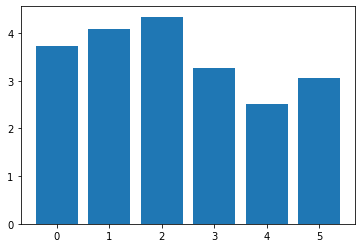

In [25]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

### Findings
So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

## View Counts

Let's see how many people in our survey saw each movie:

In [27]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

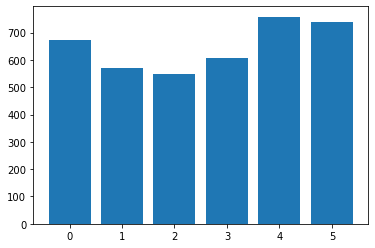

In [28]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())


### Findings

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

## Gender differences

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into `Male` or `Female`.

We'll repeat the previous analysis but based on gender below:

In [29]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

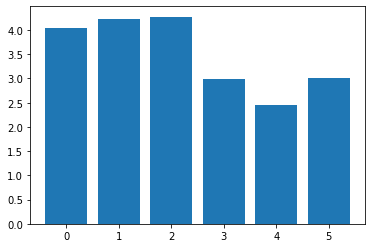

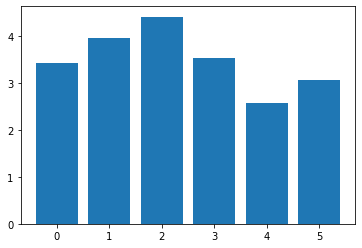

In [30]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

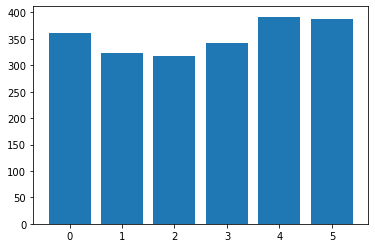

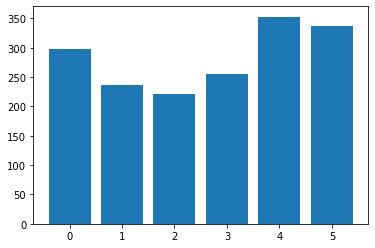

In [31]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

### Findings

Interestingly, more males watches episodes 1-3, but males liked them far less than females did. For the total number of responses we see a high count corresponding to `The Empire Strikes Back`.

## Education Data

We'll now take a look at the education column to see if we can determine any trends:


In [34]:
edu_seen = star_wars.groupby("Education").sum()
edu_seen[edu_seen.columns[3:8]]

,seen_2,seen_3,seen_4,seen_5,seen_6
Education,,,,,
Bachelor degree,170.0,163.0,195.0,243.0,234.0
Graduate degree,149.0,139.0,163.0,207.0,201.0
High school degree,48.0,48.0,53.0,61.0,60.0
Less than high school degree,3.0,3.0,3.0,3.0,3.0
Some college or Associate degree,186.0,183.0,180.0,227.0,223.0


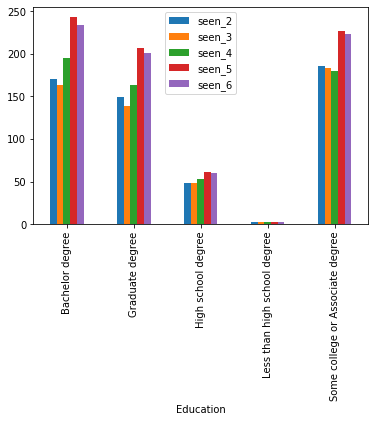

In [35]:
edu_seen[edu_seen.columns[3:8]].plot(kind='bar')

### Findings:

Among the survey respondents, the highest totals are in the group with `Some college or Associate degree`, followed closely by `Bachelor degree` and `Graduate degree`. We see a very strong response through the majority of survey responses for `seen_5` which corresponds to `The Empire Strikes Back`, regardless of education level. 

## Location Data

We'll now do the same thing for `Location (Census Region)`, to analyze the trends there.

In [36]:
loc = star_wars.groupby("Location (Census Region)").sum()
loc[loc.columns[3:8]]

,seen_2,seen_3,seen_4,seen_5,seen_6
Location (Census Region),,,,,
East North Central,89.0,89.0,95.0,128.0,121.0
East South Central,21.0,21.0,27.0,31.0,29.0
Middle Atlantic,69.0,70.0,76.0,83.0,85.0
Mountain,47.0,46.0,54.0,61.0,59.0
New England,44.0,43.0,48.0,55.0,54.0
Pacific,99.0,92.0,105.0,123.0,124.0
South Atlantic,82.0,79.0,93.0,125.0,120.0
West North Central,51.0,49.0,49.0,67.0,63.0
West South Central,58.0,50.0,49.0,70.0,69.0


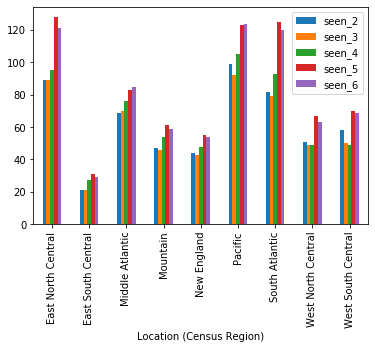

In [37]:
loc[loc.columns[3:8]].plot(kind = 'bar')

### Findings:

The location with the least viewers in our survey pool is `East South Central`. `Pacific` has the highest location. We can also see a very strong response across locations for `seen_5` which corresponds to `The Empire Strikes Back`. 

## Han Shot First

We'll continue our analysis with the `Which character shot first?` column to observe the trends there:

In [39]:
which = star_wars.groupby("Which character shot first?").sum()
which[which.columns[3:8]]

,seen_2,seen_3,seen_4,seen_5,seen_6
Which character shot first?,,,,,
Greedo,150.0,144.0,156.0,179.0,179.0
Han,265.0,260.0,287.0,313.0,311.0
I don't understand this question,149.0,139.0,157.0,258.0,240.0


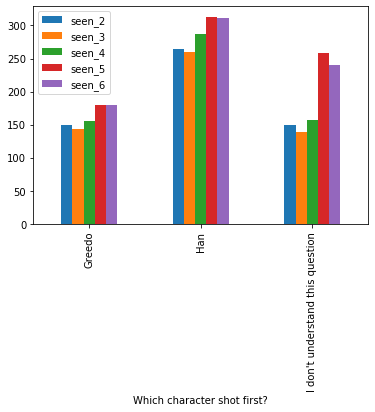

In [40]:
which[which.columns[3:8]].plot(kind = 'bar')

### Findings

Among our survey respondents, the character `Han` was selected as `Which character shot first?` by the majority. There are also a large number who responded, `I don't understand this question`. 

## Who is The Most Liked and Most Disliked Character? (The Answer will Shock You!)

We'll now clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably. We'll rename the columns so that they make more sense.

The survey has a list of characters, and for each of those the responses may range from `Very favorably`, `Somewhat favorably`, `Neither favorably nor unfavorably (neutral)`, `Somewhat unfavorably`, `Very unfavorably` or `Unfamiliar (N\A)`. 

In [41]:
cols = star_wars[star_wars.columns[15:29]].columns

star_wars = star_wars.rename(columns={
    cols[0]:"Han Solo",
    cols[1]:"Luke Skywalker",
    cols[2]:"Princess Leia",
    cols[3]:"Anakin Skywalker",
    cols[4]:"Obi Wan Kenobi",
    cols[5]:"Emperor Palpatine",
    cols[6]:"Darth Vader",
    cols[7]:"Lando Calrissian",
    cols[8]:"Boba Fett",
    cols[9]:"C-3P0",
    cols[10]:"R2D2",
    cols[11]:"Jar Jar Binks",
    cols[12]:"Padme Amidala",
    cols[13]:"Yoda"
})


#### `Who is The Most Liked and Most Disliked Character?` We'll try to find out the answer:

Han Solo             610
Luke Skywalker       552
Princess Leia        547
Anakin Skywalker     245
Obi Wan Kenobi       591
Emperor Palpatine    110
Darth Vader          310
Lando Calrissian     142
Boba Fett            138
C-3P0                474
R2D2                 562
Jar Jar Binks        112
Padme Amidala        168
Yoda                 605
dtype: int64


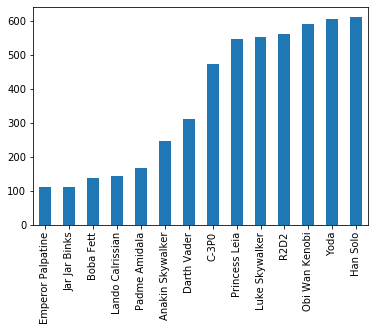

In [42]:
def fav_char(data):
    results = data.values.tolist().count("Very favorably")
    return results


popularity = star_wars[star_wars.columns[15:29]].apply(fav_char)
print(popularity)
popularity.sort_values().plot.bar()
plt.show()

In [43]:
def sw_fav_char(data):
    results = data.values.tolist().count("Somewhat favorably")
    return results


sw_popularity = star_wars[star_wars.columns[15:29]].apply(sw_fav_char)
print(sw_popularity)

Han Solo             151
Luke Skywalker       219
Princess Leia        210
Anakin Skywalker     269
Obi Wan Kenobi       159
Emperor Palpatine    143
Darth Vader          171
Lando Calrissian     223
Boba Fett            153
C-3P0                229
R2D2                 185
Jar Jar Binks        130
Padme Amidala        183
Yoda                 144
dtype: int64


### Findings: Han Solo 1st, Emperor Palatine last.

In terms of popularity, Han Solo edged out Yoda by only 5 votes as the most liked character. Obi Wan Kenobi follows in 3rd place, with R2D2 in 4th. 

The character with the least `Very favorably` votes is Emperor Palatine - however Jar Jar Binks is only 2 votes behind. 

Also it's interesting to see Darth Vader right in the middle.

Let's see if the same holds out in the lower end:

In [44]:
def least_char(data):
    results = data.values.tolist().count("Very unfavorably")
    return results


least_popular = star_wars[star_wars.columns[15:29]].apply(least_char)
print(least_popular)

Han Solo               1
Luke Skywalker         3
Princess Leia          6
Anakin Skywalker      39
Obi Wan Kenobi         7
Emperor Palpatine    124
Darth Vader          149
Lando Calrissian       8
Boba Fett             45
C-3P0                  7
R2D2                   6
Jar Jar Binks        204
Padme Amidala         34
Yoda                   8
dtype: int64


In [45]:
def not_so_fav_char(data):
    results = data.values.tolist().count("Somewhat unfavorably")
    return results


unpopularity = star_wars[star_wars.columns[15:29]].apply(not_so_fav_char)
print(unpopularity)

Han Solo               8
Luke Skywalker        13
Princess Leia         12
Anakin Skywalker      83
Obi Wan Kenobi         8
Emperor Palpatine     68
Darth Vader          102
Lando Calrissian      63
Boba Fett             96
C-3P0                 23
R2D2                  10
Jar Jar Binks        102
Padme Amidala         58
Yoda                   8
dtype: int64


### Findings:

Nomination for the least popular character, Jar Jar Binks (306 aggregate votes in `Somewhat unfavorably` and `Very unfavorably`). 

Darth Vader ties with Jar Jar Binks in the `Somewhat unfavorably` category, strengthening our hypothesis that he is the most controversial character in terms of popularity (split between likes and dislikes).
